In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
! pip install fuzzywuzzy

In [15]:
from fuzzywuzzy import fuzz

/home/ansontang/miniconda3_new/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
#! pip install xgboost

In [5]:
#from sklearn.datasets import load_diabetes
#from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import StackingRegressor

import xgboost as xgb

In [6]:
#df0 = pd.read_csv("df_valid.csv").rename(columns={"pred": "baseline"}).drop(columns=["fold", "Unnamed: 0", "text"])
#df1 = pd.read_csv("df_valid1.csv").rename(columns={"pred": "model1"}).drop(columns=["context_grp_1","text_grp_1","text_grp_2","mentioned_groups_grp_2", "text"])
#df2 = pd.read_csv("df_valid2.csv").rename(columns={"pred": "model2"}).drop(columns=["context_grp_1","text_grp_1","text_grp_2","mentioned_groups_grp_2", "text"])

In [6]:
#DF = df0.merge(df1).merge(df2)
#DF

In [236]:
df = pd.read_csv("df_valid1.csv").drop(columns=["text"])
df

,id,anchor,target,context,score,context_grp_1,text_grp_1,text_grp_2,mentioned_groups_grp_2,score_map,fold,pred
0,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,0,0,0.000072
1,ef2d4c2e6bbb208d,abatement,mixing core materials,A47,0.25,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,1,0,0.357743
2,4c3f2750e7540ab7,abatement,multi pollution abatement device,A47,0.50,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,2,0,0.317667
3,bfd7270f57530991,abatement,pollution abatement,A47,0.50,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,2,0,0.418723
4,cc96541d4987b399,abatement,rent abatement,A47,0.00,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,0,0,0.000525
...,...,...,...,...,...,...,...,...,...,...,...,...
36468,ede41dd2a61bb0a9,wood article,substrate,B44,0.25,B,performing operations; transporting,decorative arts,C14; G09; B29; B44; B31; B41; B05,1,3,0.246721
36469,4f366b6369dbfbf2,wood article,timber article,B44,0.75,B,performing operations; transporting,decorative arts,C14; G09; B29; B44; B31; B41; B05,3,3,0.999446
36470,51421420985d5c93,wood article,wood,B44,0.50,B,performing operations; transporting,decorative arts,C14; G09; B29; B44; B31; B41; B05,2,3,0.523438
36471,8ceaa2b5c2d56250,wood article,wood article,B44,1.00,B,performing operations; transporting,decorative arts,C14; G09; B29; B44; B31; B41; B05,4,3,0.999572


In [237]:
df["bias"] = df["pred"] - df["score"]
df.head()

,id,anchor,target,context,score,context_grp_1,text_grp_1,text_grp_2,mentioned_groups_grp_2,score_map,fold,pred,bias
0,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,0,0,0.000072,0.000072
1,ef2d4c2e6bbb208d,abatement,mixing core materials,A47,0.25,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,1,0,0.357743,0.107743
2,4c3f2750e7540ab7,abatement,multi pollution abatement device,A47,0.50,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,2,0,0.317667,-0.182333
3,bfd7270f57530991,abatement,pollution abatement,A47,0.50,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,2,0,0.418723,-0.081277
4,cc96541d4987b399,abatement,rent abatement,A47,0.00,A,human necessities,furniture; domestic articles or appliances; co...,A45; B60; E03; E05; A46; B08; F16; A47; D06; B...,0,0,0.000525,0.000525


In [238]:
def find_jaccard_index(df_row):
    target_set = set(df_row["target"].split())
    anchor_set = set(df_row["anchor"].split())
    return len(anchor_set.intersection(target_set)) / len(anchor_set.union(target_set))

def subset(df_row, col_a, col_b):
    return (df_row[col_a] in df_row[col_b]) and (len(df_row[col_b]) > len(df_row[col_a]))

def fuzz_ratio(df_row, col_a, col_b):
    return fuzz.ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_partial_ratio(df_row, col_a, col_b):
    return fuzz.partial_ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_token_set_ratio(df_row, col_a, col_b):
    return fuzz.token_set_ratio(df_row[col_a], df_row[col_b]) / 100

def fuzz_token_sort_ratio(df_row, col_a, col_b):
    return fuzz.token_sort_ratio(df_row[col_a], df_row[col_b]) / 100


In [239]:
# New features

In [240]:
df["jaccard_index"] = df.apply(find_jaccard_index, axis=1)

df["anchor ⊂ target"] = df.apply(subset, args=("anchor","target"), axis=1)
df["target ⊂ anchor"] = df.apply(subset, args=("target","anchor"), axis=1)

In [241]:
df["number_of_words"] = df["target"].str.split().apply(len).values

df["fuzz_ratio"] = df.apply(fuzz_ratio, args=("anchor","target"), axis=1)
df["fuzz_partial_ratio"] = df.apply(fuzz_partial_ratio, args=("anchor","target"), axis=1)
df["fuzz_token_set_ratio"] = df.apply(fuzz_token_set_ratio, args=("anchor","target"), axis=1)
df["fuzz_token_sort_ratio"] = df.apply(fuzz_token_sort_ratio, args=("anchor","target"), axis=1)

In [242]:
#X = DF.drop(columns=["baseline", "model1", "model2"])
#X

In [243]:
df = df[["context_grp_1", "text_grp_1", "jaccard_index", "anchor ⊂ target", "target ⊂ anchor", "number_of_words",
    "fuzz_ratio", "fuzz_partial_ratio", "fuzz_token_set_ratio", "fuzz_token_sort_ratio", "pred", "bias", "score"]]
df.head()

,context_grp_1,text_grp_1,jaccard_index,anchor ⊂ target,target ⊂ anchor,number_of_words,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,pred,bias,score
0,A,human necessities,0.00,False,False,2,0.27,0.35,0.27,0.27,0.000072,0.000072,0.00
1,A,human necessities,0.00,False,False,3,0.20,0.33,0.33,0.33,0.357743,0.107743,0.25
2,A,human necessities,0.25,True,False,4,0.44,1.00,1.00,0.44,0.317667,-0.182333,0.50
3,A,human necessities,0.50,True,False,2,0.64,1.00,1.00,0.64,0.418723,-0.081277,0.50
4,A,human necessities,0.50,True,False,2,0.78,1.00,1.00,0.78,0.000525,0.000525,0.00


In [244]:
df.corr()

,jaccard_index,anchor ⊂ target,target ⊂ anchor,number_of_words,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,pred,bias,score
jaccard_index,1.000000,0.359760,0.249074,0.275053,0.739894,0.727435,0.857627,0.756981,0.433071,0.021337,0.391743
anchor ⊂ target,0.359760,1.000000,-0.047205,0.180084,0.281142,0.406478,0.360223,0.283221,0.194873,-0.003619,0.184482
target ⊂ anchor,0.249074,-0.047205,1.000000,-0.228518,0.163665,0.372660,0.321515,0.165649,0.122449,0.014098,0.105758
number_of_words,0.275053,0.180084,-0.228518,1.000000,0.252689,0.171080,0.255549,0.260270,0.167878,-0.006302,0.160902
fuzz_ratio,0.739894,0.281142,0.163665,0.252689,1.000000,0.867131,0.876469,0.899480,0.481134,0.017200,0.439256
fuzz_partial_ratio,0.727435,0.406478,0.372660,0.171080,0.867131,1.000000,0.887268,0.813278,0.423606,0.019903,0.383781
fuzz_token_set_ratio,0.857627,0.360223,0.321515,0.255549,0.876469,0.887268,1.000000,0.916309,0.437732,0.027199,0.392463
fuzz_token_sort_ratio,0.756981,0.283221,0.165649,0.260270,0.899480,0.813278,0.916309,1.000000,0.465123,0.022471,0.421012
pred,0.433071,0.194873,0.122449,0.167878,0.481134,0.423606,0.437732,0.465123,1.000000,0.223738,0.796284
bias,0.021337,-0.003619,0.014098,-0.006302,0.017200,0.019903,0.027199,0.022471,0.223738,1.000000,-0.411429


In [245]:
sub_df1 = pd.get_dummies(df["context_grp_1"], prefix='context_grp_1')
sub_df2 = pd.get_dummies(df["text_grp_1"], prefix='text_grp_1')

In [248]:
df2 = pd.concat([sub_df1, df[["jaccard_index", "anchor ⊂ target", "target ⊂ anchor", "number_of_words",
    "fuzz_ratio", "fuzz_partial_ratio", "fuzz_token_set_ratio", "fuzz_token_sort_ratio", "pred", "score", "bias"]]], axis=1)

#df2 = pd.concat([sub_df1, df[["anchor ⊂ target", "target ⊂ anchor", 
#     "pred", "bias"]]], axis=1)
df2.corr()

,context_grp_1_A,context_grp_1_B,context_grp_1_C,context_grp_1_D,context_grp_1_E,context_grp_1_F,context_grp_1_G,context_grp_1_H,jaccard_index,anchor ⊂ target,target ⊂ anchor,number_of_words,fuzz_ratio,fuzz_partial_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,pred,score,bias
context_grp_1_A,1.000000,-0.188769,-0.146425,-0.067786,-0.074431,-0.125743,-0.157988,-0.160842,0.001514,0.011481,0.003558,-0.017571,0.008811,0.012629,0.016188,0.011961,-0.012636,-0.016906,0.008200
context_grp_1_B,-0.188769,1.000000,-0.218606,-0.101202,-0.111123,-0.187729,-0.235868,-0.240129,0.074618,-0.004194,0.004432,0.053312,0.058659,0.035556,0.054574,0.060034,0.035332,0.033986,-0.001524
context_grp_1_C,-0.146425,-0.218606,1.000000,-0.078501,-0.086196,-0.145618,-0.182959,-0.186264,-0.079814,-0.025960,-0.000922,-0.042738,-0.064396,-0.059950,-0.078960,-0.071993,-0.042650,-0.041700,0.002925
context_grp_1_D,-0.067786,-0.101202,-0.078501,1.000000,-0.039904,-0.067413,-0.084700,-0.086230,-0.009963,0.003018,0.011917,-0.064728,-0.003162,0.005025,-0.004467,-0.001521,-0.020839,-0.017065,-0.003902
context_grp_1_E,-0.074431,-0.111123,-0.086196,-0.039904,1.000000,-0.074021,-0.093002,-0.094683,-0.008614,-0.013285,-0.004464,-0.011442,-0.019049,-0.029503,-0.025020,-0.023259,0.004672,0.006580,-0.003562
context_grp_1_F,-0.125743,-0.187729,-0.145618,-0.067413,-0.074021,1.000000,-0.157117,-0.159955,0.011075,0.009493,0.001675,0.000100,0.004521,0.005691,0.005389,0.001316,0.014183,0.012307,0.001540
context_grp_1_G,-0.157988,-0.235868,-0.182959,-0.084700,-0.093002,-0.157117,1.000000,-0.200973,-0.029026,0.013887,-0.000903,-0.003774,-0.030389,-0.010228,-0.023732,-0.029187,0.016814,0.020428,-0.007579
context_grp_1_H,-0.160842,-0.240129,-0.186264,-0.086230,-0.094683,-0.159955,-0.200973,1.000000,0.020159,0.003263,-0.010980,0.037509,0.026243,0.025017,0.034726,0.032140,-0.009129,-0.009815,0.002059
jaccard_index,0.001514,0.074618,-0.079814,-0.009963,-0.008614,0.011075,-0.029026,0.020159,1.000000,0.359760,0.249074,0.275053,0.739894,0.727435,0.857627,0.756981,0.433071,0.391743,0.021337
anchor ⊂ target,0.011481,-0.004194,-0.025960,0.003018,-0.013285,0.009493,0.013887,0.003263,0.359760,1.000000,-0.047205,0.180084,0.281142,0.406478,0.360223,0.283221,0.194873,0.184482,-0.003619


In [249]:
# split data into X and y
X = df2.drop(columns=["bias", "score"])
Y = df2[["bias", "pred", "score"]]

In [250]:
# feature selection
#from sklearn.feature_selection import chi2
#from sklearn.feature_selection import SelectKBest

In [251]:
#chi2_selector = SelectKBest(chi2, k=10)
#X_kbest = chi2_selector.transform(X)
#chi2(X, Y)

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=25, )

In [254]:
X_train.columns

Index(['context_grp_1_A', 'context_grp_1_B', 'context_grp_1_C',
       'context_grp_1_D', 'context_grp_1_E', 'context_grp_1_F',
       'context_grp_1_G', 'context_grp_1_H', 'jaccard_index',
       'anchor ⊂ target', 'target ⊂ anchor', 'number_of_words', 'fuzz_ratio',
       'fuzz_partial_ratio', 'fuzz_token_set_ratio', 'fuzz_token_sort_ratio',
       'pred'],
      dtype='object')

In [255]:
y_train.head()

,bias,pred,score
29739,0.000067,0.000067,0.00
15955,0.008850,0.258850,0.25
26299,-0.249896,0.000104,0.25
33065,0.010470,0.510470,0.50
1564,0.032720,0.282720,0.25


In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [296]:
# fit model no training data
model = RandomForestRegressor(max_depth=8, min_samples_leaf=2, random_state=75)
#model = LinearRegression()
#model = LinearSVR()
#model = xgb.XGBRegressor(max_depth=3)
#model = RidgeCV()
#model = SVR()
#model = DecisionTreeRegressor(max_depth=5)

#cv_results = cross_validate(model, X, Y[["bias"]], cv=5,
#                         scoring=('r2', 'neg_mean_squared_error'),
#                         return_train_score=True)

#cv_results = cross_val_predict(model, X, Y[["bias"]], cv=5)


In [297]:
model.fit(X_train, y_train[["bias"]])

/home/ansontang/miniconda3_new/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=8, min_samples_leaf=2, random_state=75)

In [298]:
from sklearn.feature_selection import SelectFromModel

model.feature_importances_

array([0.00698331, 0.00796222, 0.00779119, 0.00450102, 0.00220451,
       0.00302137, 0.0118788 , 0.00710616, 0.03910988, 0.00181466,
       0.00084614, 0.03294371, 0.09451328, 0.06623636, 0.08230422,
       0.08564461, 0.54513857])

In [299]:
model.feature_names_in_

array(['context_grp_1_A', 'context_grp_1_B', 'context_grp_1_C',
       'context_grp_1_D', 'context_grp_1_E', 'context_grp_1_F',
       'context_grp_1_G', 'context_grp_1_H', 'jaccard_index',
       'anchor ⊂ target', 'target ⊂ anchor', 'number_of_words',
       'fuzz_ratio', 'fuzz_partial_ratio', 'fuzz_token_set_ratio',
       'fuzz_token_sort_ratio', 'pred'], dtype=object)

In [300]:
# make predictions for test data
y_pred = model.predict(X_test)
y_pred

array([ 0.03040598,  0.02384845, -0.00481857, ...,  0.0155117 ,
       -0.05162446, -0.00348773])

In [301]:
y_test["bias_estimated"] = y_pred
y_test[["bias", "bias_estimated"]].corr()

,bias,bias_estimated
bias,1.000000,0.318244
bias_estimated,0.318244,1.000000


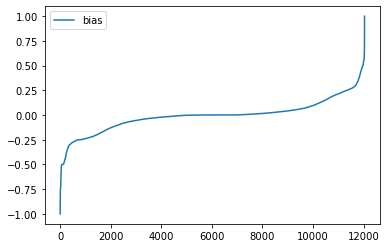

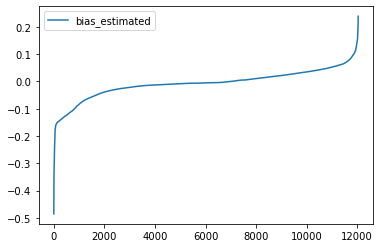

In [302]:
y_test[["bias"]].sort_values("bias").reset_index(drop=True).plot()
y_test[["bias_estimated"]].sort_values("bias_estimated").reset_index(drop=True).plot()

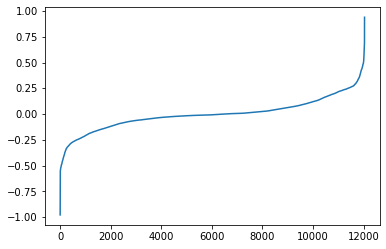

In [303]:
(y_test["bias_estimated"] - y_test["bias"]).sort_values().reset_index(drop=True).plot()

In [304]:
y_test["pred_corrected"] = y_test["pred"] - y_test["bias_estimated"]
y_test.head()

,bias,pred,score,bias_estimated,pred_corrected
11465,-0.156479,0.593521,0.75,0.030406,0.563115
5870,0.046777,0.546777,0.50,0.023848,0.522929
33535,0.016416,0.266416,0.25,-0.004819,0.271235
21212,-0.271750,0.478250,0.75,0.005369,0.472881
13114,-0.069818,0.430182,0.50,-0.001386,0.431568


In [305]:
y_test[["score", "pred", "pred_corrected"]].corr()

,score,pred,pred_corrected
score,1.000000,0.798448,0.811006
pred,0.798448,1.000000,0.983336
pred_corrected,0.811006,0.983336,1.000000


In [306]:
y_test.sort_values("bias_estimated").head(30)

,bias,pred,score,bias_estimated,pred_corrected
18624,-0.938692,0.061308,1.00,-0.485183,0.546491
6129,-0.499253,0.000747,0.50,-0.437325,0.438072
5,0.001452,0.001452,0.00,-0.425292,0.426744
28658,0.002577,0.002577,0.00,-0.403958,0.406535
17806,-0.184329,0.065671,0.25,-0.392321,0.457992
23841,-0.146693,0.103307,0.25,-0.379699,0.483006
5770,-0.389340,0.110660,0.50,-0.353040,0.463700
28847,-0.658183,0.091817,0.75,-0.352958,0.444775
8768,-0.470894,0.029106,0.50,-0.342803,0.371909
3336,-0.716644,0.033356,0.75,-0.336374,0.369730


In [307]:
y_test.sort_values("bias_estimated", ascending=False).head(30)

,bias,pred,score,bias_estimated,pred_corrected
9277,0.249237,0.999237,0.75,0.238564,0.760674
17248,-0.002449,0.997551,1.00,0.213241,0.784311
21570,-0.029137,0.970863,1.00,0.210445,0.760418
16915,-0.057882,0.942118,1.00,0.205485,0.736633
10933,0.248585,0.998585,0.75,0.203762,0.794823
19369,0.244306,0.994306,0.75,0.203115,0.791191
7143,-0.001019,0.998981,1.00,0.200311,0.798670
25593,0.165941,0.915941,0.75,0.199711,0.716230
14345,0.499157,0.999157,0.50,0.195732,0.803425
4783,0.498266,0.998266,0.50,0.195556,0.802710


In [311]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[5]

export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = model.feature_names_in_,
                class_names = "bias_estimated",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
#Image(filename = 'tree.png')